In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import log_loss,accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

In [2]:
filePath = "../Kaggle_Dataset/car-consume/measurements.csv"
df = pd.read_csv(filePath)
display(df.head())
df.describe()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [3]:
#不要列削除
df = df.drop(columns="specials")
df = df.drop(columns="refill liters")
df = df.drop(columns="refill gas")

In [4]:
#燃料消費量(l/100km)の数値化
colName="consume"
df[colName]=df[colName].str.replace(",",".")
df[colName]=pd.to_numeric(df[colName], errors="coerce")
#df = df[~np.isnan(df[colName])]

In [5]:
#距離の数値化
colName="distance"
df[colName]=df[colName].str.replace(",",".")
df[colName]=pd.to_numeric(df[colName], errors="coerce")
#df = df[~np.isnan(df[colName])]

In [6]:
#外気温内気温の数値化
colName="temp_outside"
#df[colName]=df[colName].str.replace(",",".")
df[colName]=pd.to_numeric(df[colName], errors="coerce")
colName="temp_inside"
df[colName]=df[colName].str.replace(",",".")
df[colName]=pd.to_numeric(df[colName], errors="coerce")
df = df[~np.isnan(df[colName])]  #nan値の削除

In [7]:
#燃料種別を数値に変換
colName="gas_type"
df[colName] = df[colName].replace('E10' ,0)
df[colName] = df[colName].replace('SP98' ,1)
df[colName]=pd.to_numeric(df[colName], errors="coerce")
df[colName].value_counts()

1    219
0    157
Name: gas_type, dtype: int64

In [8]:
#気温差列を追加してみる
df["tempDiff"] = abs(df["temp_outside"]-df["temp_inside"])

In [9]:
###今回は燃料の種類をE10に絞って考える
#df = df[df["gas_type"]==0]
#df = df.drop(columns="gas_type")

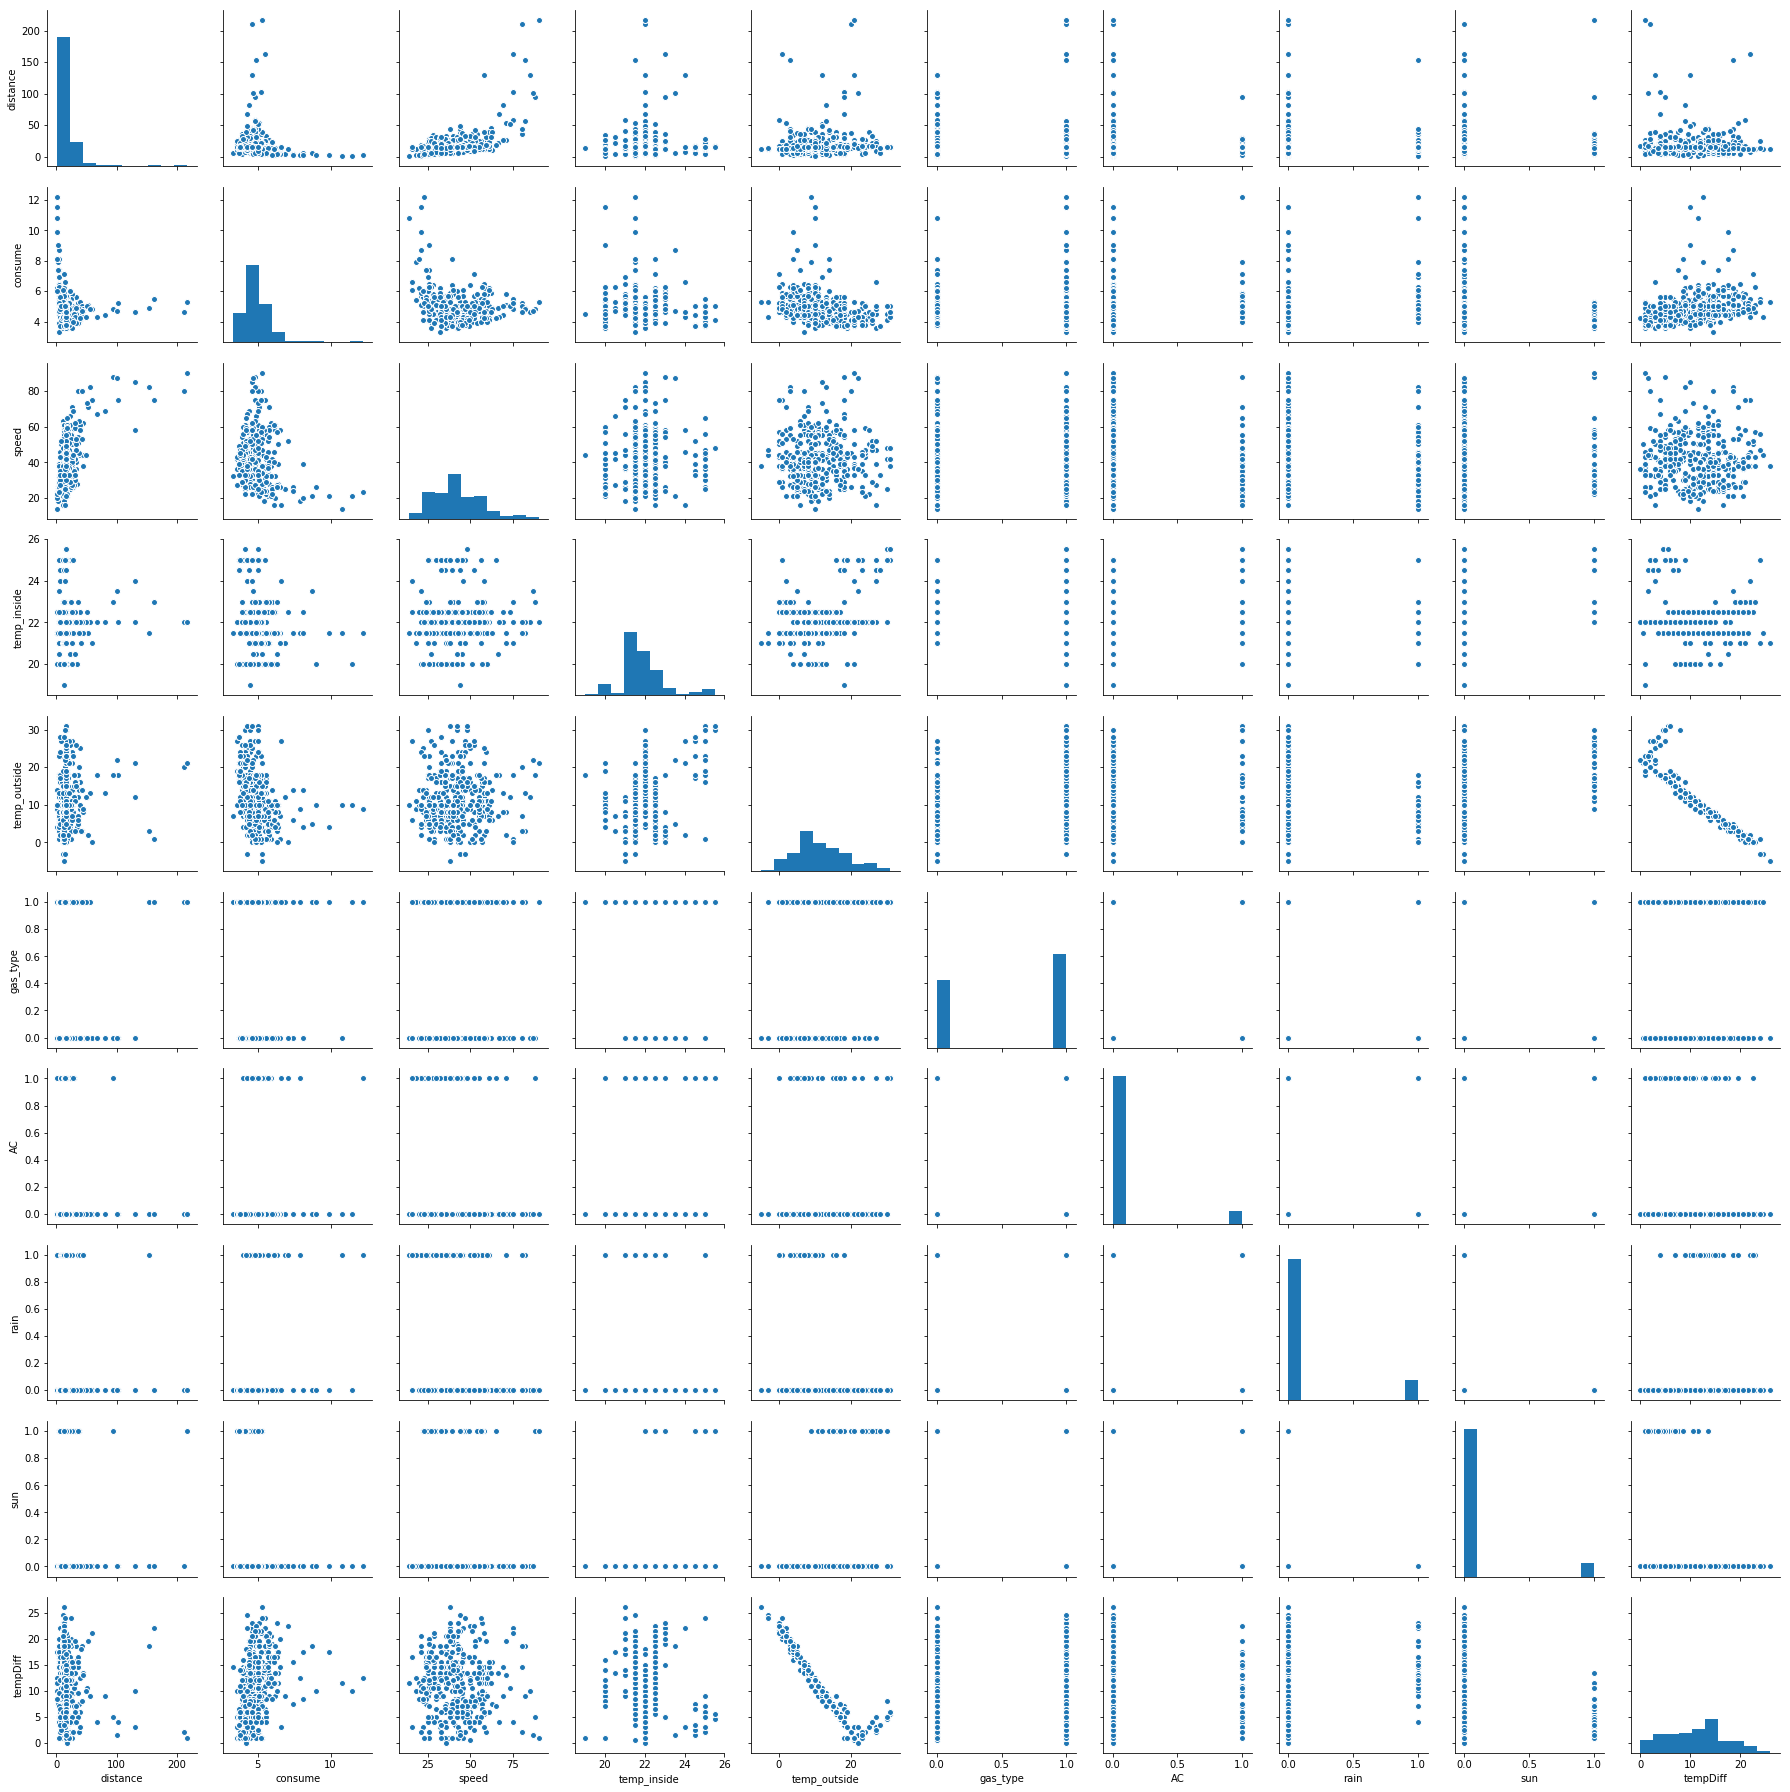

In [10]:
#散布図行列
sns.pairplot(df)
plt.show()

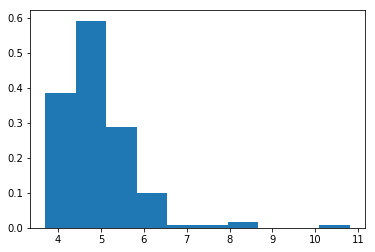

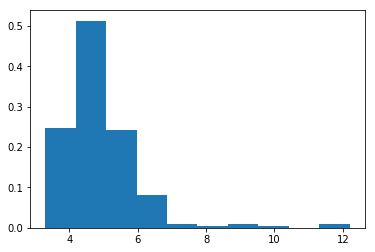

In [11]:
#ガソリン種類に応じたグラフの表示
df_E10=df[df["gas_type"]==0]
df_SP=df[df["gas_type"]==1]

plt.hist(df_E10["consume"],normed=True)
plt.show()
plt.hist(df_SP["consume"],normed=True)
plt.show()

In [12]:
#相関係数
df_corr=df.corr()
print(df_corr)

              distance   consume     speed  temp_inside  temp_outside  \
distance      1.000000 -0.131379  0.565505     0.075305      0.086774   
consume      -0.131379  1.000000 -0.234537    -0.161991     -0.318758   
speed         0.565505 -0.234537  1.000000     0.059725      0.019327   
temp_inside   0.075305 -0.161991  0.059725     1.000000      0.361308   
temp_outside  0.086774 -0.318758  0.019327     0.361308      1.000000   
gas_type     -0.047877 -0.020928 -0.099495     0.010340      0.156990   
AC           -0.027670  0.093892 -0.036351     0.297775      0.169374   
rain         -0.022129  0.247699 -0.002936    -0.037356     -0.185731   
sun           0.078627 -0.169173  0.077181     0.246120      0.349988   
tempDiff     -0.103673  0.312452 -0.029385    -0.150228     -0.938296   

              gas_type        AC      rain       sun  tempDiff  
distance     -0.047877 -0.027670 -0.022129  0.078627 -0.103673  
consume      -0.020928  0.093892  0.247699 -0.169173  0.312452  
s

In [13]:
df["temp_outside"].dtype

dtype('int64')

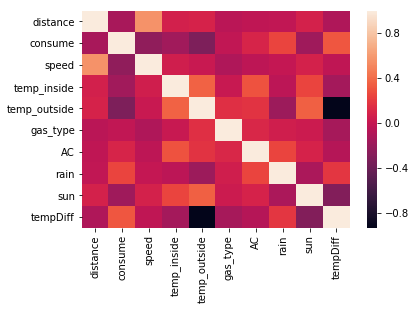

In [14]:
#相関係数ヒートマップ
sns.heatmap(df_corr)
plt.show()

In [15]:
#線形回帰
y=df["consume"]
X=df[["gas_type","speed","tempDiff","sun","rain"]]
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

# 重みを取り出す
w0 = lr.intercept_
w1 = lr.coef_[0]
w2 = lr.coef_[1]
w3 = lr.coef_[2]
w4 = lr.coef_[3]
w5 = lr.coef_[4]

print("w0=",w0,"\tw1=",w1,"\tw2=",w2,"\tw3=",w3,"\tw4=",w4,"\tw5=",w5)

w0= 5.097277121184166 	w1= -0.03615113420109353 	w2= -0.017009382066562728 	w3= 0.04508285446014057 	w4= -0.20227586361248692 	w5= 0.6155694141203143


In [16]:
#モデルでの予測
y_mdl=lr.predict(X)

er = 0.5*(np.sum((y_mdl-y)**2))
print("二乗誤差=",er)


二乗誤差= 164.67999366324136


In [17]:
#モデル評価
mse = mean_squared_error(y, y_mdl) 
print("MSE = %s"%round(mse,3) )  

mae = mean_absolute_error(y, y_mdl) 
print("MAE = %s"%round(mae,3) )

rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.876
MAE = 0.615
RMSE = 0.936
